El problema consiste en dos pendulo conectados por un resorte en sus masas, para una solucion mas sencilla vamos a cosiderar pequeños angulos es decir que :$cos\theta=1;\,sen\theta=\theta$ 

Este problema se solucionara por las ecuaciones de Lagrange del movimento:

\begin{equation}
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial q_i}\right)=\frac{\partial L}{\partial q_i}
\end{equation}

Para esto definiremos el Lagrangiano como:

\begin{equation}
L=T-U
\end{equation}
Definiremos las constantes de nuestro sistema como:

l= Longitud de los péndulos.

k= Constante elastica del resorte.

g= Sera la gravedad

m= Masa de los péndulos.

Y las variables de nuestro seran los angulos:

$\theta$= ángulo de oscilación péndulo 1

$\varphi$= ángulo de oscilación péndulo 2

Para poder reemplazar las posiciones en nuestra energia cinetica y potencial:

\begin{equation*}
x_{1}=l\theta  \Rightarrow \, \dot{x_1}=l\dot{\theta}
\end{equation*}

\begin{equation}
x_{2}=l+l\varphi \Rightarrow \, \dot{x_2}=l\dot{\varphi} 
\end{equation}

\begin{equation}
 y_1=-l \Rightarrow\, \dot{y_1}=0
\end{equation}

\begin{equation}
y_2=-l \Rightarrow \, \dot{y_2}=0
\end{equation}

reemplazando obtenemos que:

\begin{equation}
T=\frac{1}{2}m\left( l^2\dot{\theta}^2\right)+\frac{1}{2}m\left( l^2\dot{\varphi}^2\right)
\end{equation}

\begin{equation}
U=\frac{mgl}{2}\left(\theta^2+\varphi^2\right)+\frac{kl^2}{2}\left(\theta-\varphi\right)^2
\end{equation}

por lo tanto el lagrangiano queda:

\begin{equation}
L=\frac{1}{2}m\left( l^2\dot{\theta}^2\right)+\frac{1}{2}m\left( l^2\dot{\varphi}^2\right)-\frac{mgl}{2}\theta^2-\frac{mgl}{2}\varphi^2-\frac{kl^2}{2}\left(\theta-\varphi\right)^2
\end{equation}

aplicando la ecuacion de euler lagrange para $\theta$:

\begin{equation}
\frac{\partial L}{\partial\theta}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\theta}=-mgl\theta-kl^2(\theta-\varphi)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\theta}}=ml^2\dot{\theta} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)=ml^2\ddot{\theta}
\end{equation}

\begin{equation}
\Rightarrow -mgl\theta-kl^2(\theta-\varphi)-ml^2\ddot{\theta}=0
\end{equation}

cancelando los negativos y reorganizando la primera ecuación diferencial nos queda:

\begin{equation}
\ddot{\theta}+\frac{g}{l}\theta+\frac{k}{m}(\theta-\varphi)=0
\end{equation}

aplicando la ecuación de Euler lagrange para $\varphi$:

\begin{equation}
\frac{\partial L}{\partial\varphi}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\varphi}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\varphi}=-mgl\varphi+kl^2(\theta-\varphi)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\varphi}}=ml^2\dot{\varphi} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\varphi}}\right) = ml^2\ddot{\varphi} 
\end{equation}

\begin{equation}
\Rightarrow mgl\varphi-kl^2(\theta-\varphi)+ml^2\ddot{\varphi} =0
\end{equation}

Reorganizando terminos con el fin de que $\ddot{\varphi}$ quede solo tenemos:

\begin{equation}
\ddot{\varphi}+\frac{y}{l}\varphi-\frac{k}{m}(\theta-\varphi)=0
\end{equation}


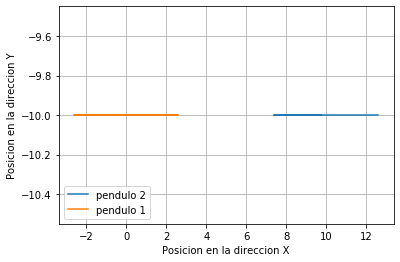

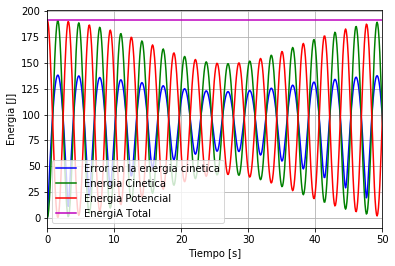

In [105]:
from numpy import array, linspace, shape,matrix,transpose
from math import sin, cos, pi,sqrt,atan
from scipy.integrate import odeint
from pylab import plot,legend,xlabel,ylabel
from vpython import  curve,box,cylinder,helix,sphere, scene, vector, color, arrow, text, sleep
import matplotlib.pyplot as plt
import numpy as np
def solucion (f,t,g,l,k,m):
    df1=f[1]
    df2=-(g/l)*f[0]-(k/m)*(f[0]-f[2])
    df3=f[3]
    df4=-(g/l)*f[2]+(k/m)*(f[0]-f[2])
    return array([df1,df2,df3,df4])
l=10#longitud del pendulo
k=3#constante elastica
m=50#masa
g=9.8#gravedad
thetaI=5*pi/180# angulo inicial del pendulo 1
thetaIp=0#velocidad angular incial del pendulo 1
phiI=15*pi/180# angulo inicial del pendulo 2
phiIp=0#velocidad angular incial del pendulo 2
tI=0#tiempo inical
tf=100#tiempo final
n=1000#cantidad de pasos
t=linspace(tI,tf,n)#arreglo temporal
condINI=array([thetaI,thetaIp,phiI,phiIp])
sol,ER=odeint(solucion,condINI,t,args=(g,l,k,m),full_output=True)
xp=l*thetaI
yp=-l
zp=0
r=1
ki=((1/2)*m*(l*thetaIp)**2)+(1/2)*m*(l*phiIp)**2
ui=(m*g*l/2)*((thetaI**2)+(phiI**2))+((k*(l)**2)/2)*(thetaI-phiI)**2
KIV=ki*np.ones((n,1))#valor inicial de la energia cinetica
UIV=ui*np.ones((n,1))#valor inical de la energia potencial 
K=((m/2)*(l*sol[:,1])**2)+(m/2)*(l*sol[:,3])**2#energia cinetica
U=(m*g*l/2)*((sol[:,0]**2)+(sol[:,2]**2))+((k*(l)**2)/2)*(sol[:,0]-sol[:,2])**2#energia potencial
E=K+U#energia total
KdTe=(l**2)*(m*sol[:,1])#derivada parcial de la energia cinetica con respecto a theta punto
KdPhi=(l**2)*(m*sol[:,3])#derivada parcial de la energia cinetica con respecto a phi
UdTe=(k*(2*sol[:,0]-2*sol[:,2])*l**2)/2 + g*m*sol[:,0]*l#derivada parcial de la energia potencial con respecto a theta
UdPhi=g*l*m*sol[:,2]-(k*l**2*(2*sol[:,0]-2*sol[:,2]))/2#derivada parcial de la energia potencial con respecto a phi

Paso=(tf/n)
ERT=[]
for i in range (0,n):
    ERTHe=sqrt(((Paso*KdTe[i])**2)+((Paso*KdPhi[i])**2))
    ERT.append(ERTHe)

x1=l*sol[:,0]
y1=-l*np.ones((n,1))
x2=l*sol[:,2]+l
y2=-l*np.ones((n,1))
plt.plot(x2,y2,label='pendulo 2')
plt.plot(x1,y1,label='pendulo 1')
xlabel('Posicion en la direccion X')
ylabel('Posicion en la direccion Y')
legend(loc='lower left')
plt.grid('on')

plt.show()

plt.plot(t,ERT,'b',label='Error en la energia cinetica')
#plt.plot(t,KIV,'r')

plt.plot(t,K,'g',label='Energia Cinetica')
plt.grid('on')
plt.plot(t,U,'r',label='Energia Potencial')
plt.plot(t,E,'m',label='EnergiA Total')
#plt.plot(t,UIV,'b')
plt.xlim(0,50)
xlabel('Tiempo [s]')
ylabel('Energia [J]')
legend(loc='lower left')

Podemos analizar la energia potencial (roja) donde podemos observar que dicha oscila esta puede ser debido a que la particula esta sometida a un resorte, cuando dicho resorte alcanza un maximo en la posicion la energia potencial sera maxima, y dicha energia potencial sera minima cuando el pendulo tenga la energia cinetica maxima, debido a que se tuvo en cuenta la aproximacion de angulos pequeños la energia potencial gravitacional no sera tan relevante, sim embargo para el momento de realizar el lagrangiano si se tendra en cuenta.

La grafica del error (azul) como se puede notar tambien oscila y ademas tiene ciertos valores maximos y minimos que coinciden con la energia cinetica. 

La grafica de la energia total (magenta) como podemos notar es constante en el tiempo, esto es por que es la suma de la energia cinetica con la potencial y al ser un sistema conservativo, es decir no hay perdida de energia, esta debera ser una constante.

Podemos oberservar que la grafica de las energias es oscilatorias esto debido a que sus velocidades angulares, iran variando respecto a la energia potencial elastica que le transfiera un pendulo a otro (ver simulacion).

Podemos obervar que las graficas de la posiciones son constantes en $Y$ debido a la aproximacion de angulos y estos solo se moveran en la direccion $X$.